In [91]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from scipy import interpolate as interp

# Problem 1

# Problem 2

In [163]:

def ndiff(fun, x, full = False):
    #Addapted from Sieviers code:
    
    ϵ = 10**-16 # accuracy 
    dx=ϵ**(1/3)
    
    y_max = fun(x + dx) 
    y_min = fun(x - dx)    
    deriv = (y_max - y_min)/(2 * dx)
    error = fun(x) * ϵ/ dx 
    if full == True:
        return deriv, dx, error
    else:
        return deriv
    

In [164]:
ndiff(np.cos, 3, True)

(-0.14112000806187927, 4.641588833612782e-06, -2.13287417754727e-11)

In [155]:
-np.sin(3)

-0.1411200080598672

# Problem 3

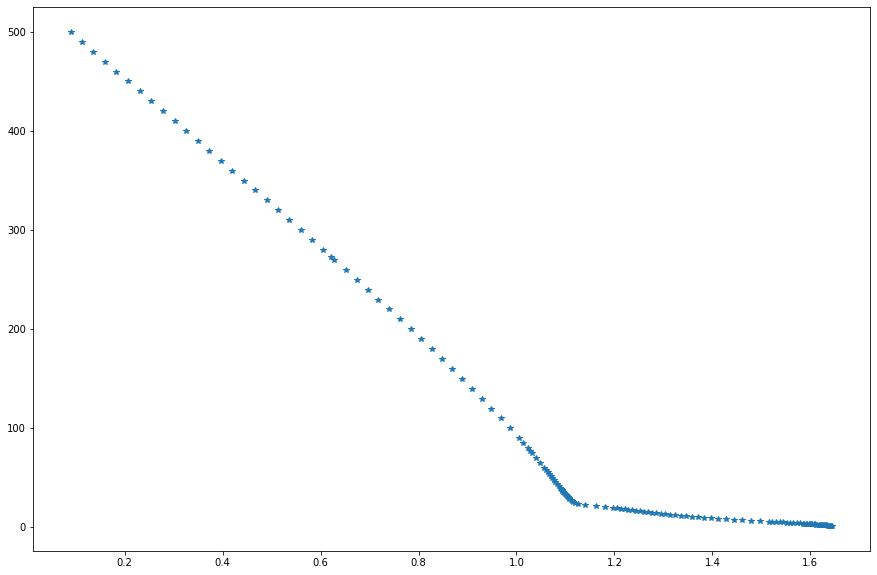

In [110]:
dat = np.loadtxt('/Users/junalexsugiyama/Desktop/PHYS512/repo/phys512-2022/problem_sets/lakeshore.txt')
def lakeshore(V, data):
    T = data[:, 0]
    V_dat = data[:, 1]
    
    interpolated_T = np.array([])
    
    if type(V) != np.array([]):
        V = np.array([V])
        
   closest_points = np.array[]

    for v_o in V:
        points = []
         ϵ = max(V_dat) - max(v_o)
        for i in range(len(V_dat):)
            α = np.abs(v_o - V_dat[i])
            if α < ϵ:
                if i == 0
                    points.append[i, i + 1, i+2, i+3]
                if i == len(V_dat)-1:
                    points.append[i -2, ]
                α = ϵ
                
            if 
    

lakeshore(24, dat)

# Problem 4

/Users/junalexsugiyama/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<Figure size 432x288 with 0 Axes>

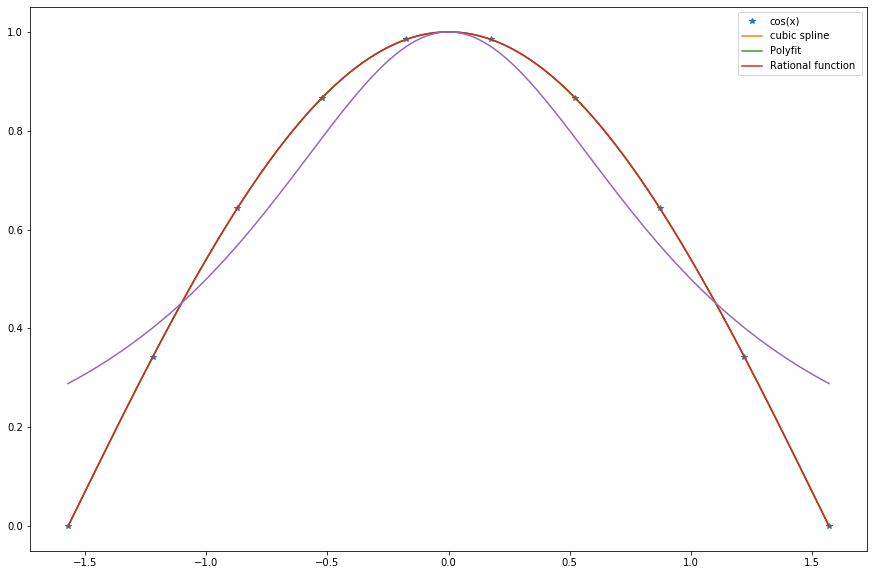

Cubic spline error is  5.4764056344440255e-05 
Polifit error is 8.825430841581199e-05 
Rational function error is  1.566669640799707e-06


In [174]:
n=4
m=7

fun = np.cos
t = np.linspace(-np.pi/2, np.pi/2, 1001)
ytrue=fun(t) # the true function given all 1001 data points

x = np.linspace(t[0], t[-1], n + m -1 ) # fragmented dated given for interpolation
y = fun(x)

#Cubic Spline
#Sievers code

spl=interp.splrep(x,y) #generate the spline using scipy
yfine_spl=interp.splev(t,spl) #evaluate the spline on fine t

# Rational function interpolation

def rat_eval(p,q,x):
    top=0
    for i in range(len(p)):
        top=top+p[i]*x**i
    bot=1
    for i in range(len(q)):
        bot=bot+q[i]*x**(i+1)
    return top/bot

def rat_fit(x,y,n,m):
    assert(len(x)==n+m-1)
    assert(len(y)==len(x))
    mat=np.zeros([n+m-1,n+m-1])
    for i in range(n):
        mat[:,i]=x**i
    for i in range(1,m):
        mat[:,i-1+n]=-y*x**i
    pars=np.dot(np.linalg.inv(mat),y)
    p=pars[:n]
    q=pars[n:]
    return p,q

p,q=rat_fit(x,y,n,m)
pred=rat_eval(p,q,t)


# Polynomial
#we can use numpy's polynomial fitter to see how that does
pp=np.polyfit(x,y,n+m) #use same number of terms
yy_poly=np.polyval(pp,t)


# Lorentzian
xL = np.linspace(-1, 1, 9)

def lorentzian(x):
    return 1/(1+ x**2)

lorentz = lorentzian(t)


# Plotting the graphs of interpolated functions
plt.ion()
plt.clf()
plt.figure(figsize = (15, 10))
plt.plot(x,y,'*', label = 'cos(x)')
plt.plot(t,yfine_spl, label= 'cubic spline')
plt.plot(t,yy_poly, label = 'Polyfit')
plt.plot(t, pred, label = 'Rational function ' )
plt.plot(t, lorentz)
plt.plot()
plt.legend()
plt.show()
print('Cubic spline error is ',np.std(ytrue-yfine_spl), '\n'
     'Polifit error is', np.std(ytrue - yy_poly), '\n'
     'Rational function error is ', np.std(ytrue - pred), "\n"
     



